

### INSTALL IMPORT pycaret classification Shap


In [1]:
!pip install pycaret pandas shap


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=33dcb47cf70325e65ea9125e628d29eb9dfd33a46052e9890889fd0d7df1a239
  Stored in directory: c:\users\insa\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=06ce1896d5b6ac5b25e136e9de145ba883fd1b990c002a2518bd6a363bc8a651
  Stored in directory: c:\users\insa\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b

In [2]:
import pandas as pd
from pycaret.classification import *
from pycaret.regression import * 

C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# load Data

In [2]:
base= pd.read_csv('base_2021.csv', index_col = 0)
base.head()

,Num_Train,Date,nbre_operation,Id_Agent,Direction_Ligne,Sous_Ligne,Ligne_Presence_imposee,Gare Origine,Heure_Origine,Gare Fin,Heure_Fin,nbre_voy_reconstruc,annee,mois,jour_semaine,periode_pointe,Sens_circulation
0,836404,2021-04-05,1,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,39.0,2021,4,0,hors pointe,1
1,836404,2021-04-11,7,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,65.0,2021,4,6,hors pointe,1
2,836404,2021-04-18,7,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,75.0,2021,4,6,hors pointe,1
3,836404,2021-04-25,14,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,129.0,2021,4,6,hors pointe,1
7,836406,2021-04-02,2,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,12,Vittel,2,8.0,2021,4,4,pointe midi,1


In [3]:
base_ = base.drop(['Date', 'Num_Train', 'annee', 'Heure_Fin', 'Gare Origine', 'Gare Fin','Direction_Ligne'
                      , 'Ligne_Presence_imposee', 'Sens_circulation','Heure_Origine','periode_pointe','mois'] , axis = 1)

base_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38660 entries, 0 to 39026
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nbre_operation       38660 non-null  int64  
 1   Id_Agent             38660 non-null  float64
 2   Sous_Ligne           38660 non-null  object 
 3   nbre_voy_reconstruc  38660 non-null  float64
 4   jour_semaine         38660 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [4]:
base_.dtypes


nbre_operation           int64
Id_Agent               float64
Sous_Ligne              object
nbre_voy_reconstruc    float64
jour_semaine             int64
dtype: object

In [5]:
base_['nbre_voy_reconstruc']

0         39.0
1         65.0
2         75.0
3        129.0
7          8.0
         ...  
39022     45.0
39023     19.0
39024     45.0
39025     43.0
39026      2.0
Name: nbre_voy_reconstruc, Length: 38660, dtype: float64

In [7]:
base_['nbre_operation']

0         1
1         7
2         7
3        14
7         2
         ..
39022    12
39023    14
39024    11
39025     6
39026     1
Name: nbre_operation, Length: 38660, dtype: int64

# Train and evaluate  model 

In [15]:
setup??


In [6]:
cat_features = ['Id_Agent', 'Sous_Ligne', 'jour_semaine']
experiment = setup(base_, target='nbre_operation', categorical_features=cat_features)

,Description,Value
0,session_id,1507
1,Target,nbre_operation
2,Original Data,"(38660, 5)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27061, 78)"


In [24]:

# return best model
best = compare_models()
# return best model based on MAPE
best = compare_models(sort = 'MAPE') #default is 'R2'
# compare specific models
best_specific = compare_models(whitelist = ['dt','rf','xgboost'])
# blacklist certain models
best_specific = compare_models(blacklist = ['catboost'])
# return top 3 models based on R2
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.4435,4.6598,2.1573,0.3512,0.5786,0.5468,6.5220
omp,Orthogonal Matching Pursuit,1.5308,4.7725,2.1833,0.3354,0.6197,0.5876,0.0920
gbr,Gradient Boosting Regressor,1.4087,4.2152,2.0522,0.4126,0.5656,0.5898,7.0300
lightgbm,Light Gradient Boosting Machine,1.3888,4.1710,2.0415,0.4186,0.5549,0.5959,0.4920
br,Bayesian Ridge,1.4773,4.5078,2.1220,0.3721,0.5986,0.6063,0.6380
xgboost,Extreme Gradient Boosting,1.4040,4.3279,2.0796,0.3962,0.5576,0.6072,11.4340
ridge,Ridge Regression,1.4780,4.5115,2.1229,0.3716,0.5989,0.6081,0.0980
lr,Linear Regression,1.4783,4.5133,2.1234,0.3713,0.5990,0.6085,0.2330
lasso,Lasso Regression,1.6584,5.5475,2.3541,0.2272,0.6581,0.6196,0.1330
en,Elastic Net,1.6568,5.5461,2.3538,0.2274,0.6571,0.6200,0.0850


TypeError: compare_models() got an unexpected keyword argument 'whitelist'

In [7]:
# return best model
best = compare_models()
# return best model based on MAPE
best = compare_models(sort = 'MAPE') #default is 'R2'

# return top 3 models based on R2
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.3817,4.1117,2.0271,0.4212,0.5530,0.5930,0.5950
gbr,Gradient Boosting Regressor,1.4044,4.1800,2.0439,0.4116,0.5651,0.5866,6.4850
xgboost,Extreme Gradient Boosting,1.3957,4.2680,2.0654,0.3991,0.5557,0.6032,12.5620
br,Bayesian Ridge,1.4680,4.4465,2.1080,0.3741,0.5973,0.6027,0.6100
ridge,Ridge Regression,1.4683,4.4508,2.1090,0.3736,0.5975,0.6043,0.0920
lr,Linear Regression,1.4684,4.4532,2.1096,0.3732,0.5976,0.6047,0.2110
lar,Least Angle Regression,1.4684,4.4532,2.1096,0.3732,0.5976,0.6047,0.1150
huber,Huber Regressor,1.4355,4.5976,2.1436,0.3529,0.5771,0.5468,5.1280
omp,Orthogonal Matching Pursuit,1.5218,4.7311,2.1745,0.3342,0.6189,0.5813,0.1340
rf,Random Forest Regressor,1.4984,4.9829,2.2318,0.2984,0.5922,0.6721,27.0500


In [ ]:
#compare_models= compare_models(blacklist = None, whitelist = None, fold = 10,  round = 4,  sort = ‘R2’, n_select = 1, turbo = True, verbose = True)


In [ ]:

#le MAPE ne peut s’appliquer qu’à des valeurs strictement POSITIVES.Plus la MAPEest proche de zero mieux se porte le model.
#RMSE
#Plus la valeur des critères RMSE ou MSE est proche de zéro, meilleur est le modèle évalué en
#terme d’exactitude.bon RMSE (exactitude)/ biais faible (fidélité)

In [25]:
# train linear regression model
lr = create_model('lr') #lr is the id of the model
# check the model library to see all models
models()
# train rf model using 5 fold CV
rf = create_model('rf', fold = 5)
# train svm model without CV
svm = create_model('svm', cross_validation = False)
# train xgboost model with max_depth = 10
#xgboost = create_model('xgboost', max_depth = 10)
# train xgboost model on gpu
#xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0) #0 is gpu-id
# train multiple lightgbm models with n learning_rate
import numpy as np
lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]
# train custom model
from gplearn.genetic import SymbolicRegressor
symreg = SymbolicRegressor(generation = 50)
sc = create_model(symreg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4756,4.7957,2.1899,0.3143,0.5836,0.6549
1,1.4549,5.2432,2.2898,0.3519,0.5675,0.6416
2,1.4429,4.5606,2.1356,0.3777,0.5716,0.6170
3,1.4820,4.8571,2.2039,0.3080,0.5819,0.6337
4,1.4464,4.8529,2.2029,0.2920,0.5727,0.6307
5,1.4258,4.4912,2.1193,0.3671,0.5651,0.6384
6,1.4782,4.8193,2.1953,0.3273,0.5749,0.6389
7,1.4009,4.3299,2.0808,0.3379,0.5603,0.6228
8,1.4446,5.0224,2.2411,0.3644,0.5640,0.6304
9,1.4805,4.9165,2.2173,0.2787,0.5789,0.6467


IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:02:18
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE


XGBoostError: [17:54:25] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:548: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

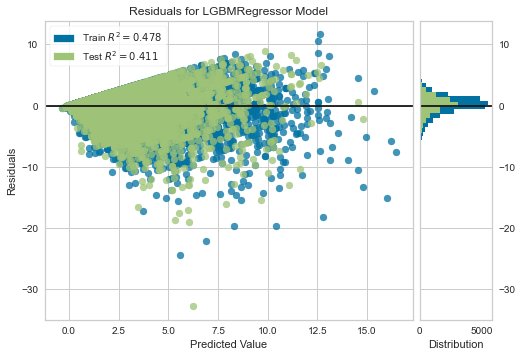

In [26]:
# create a model
lightgbm = create_model('lightgbm')
# plot a model 
plot_model(lightgbm)
#lightGBM rend accessible l'importance  des caracteristiques .Le mode de calcul est déterminé par le paramètre importance type.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4099,4.1470,2.0364,0.4071,0.5648,0.6107
1,1.3971,4.6188,2.1491,0.4291,0.5528,0.6041
2,1.3748,4.0024,2.0006,0.4539,0.5507,0.5760
3,1.3963,4.1528,2.0378,0.4084,0.5602,0.5748
4,1.3714,4.1421,2.0352,0.3957,0.5564,0.5850
5,1.3933,4.0619,2.0154,0.4276,0.5514,0.6100
6,1.4119,4.1622,2.0401,0.4190,0.5562,0.6013
7,1.3359,3.7025,1.9242,0.4338,0.5439,0.5904
8,1.3909,4.4923,2.1195,0.4315,0.5511,0.5961
9,1.4068,4.2286,2.0563,0.3797,0.5618,0.6110


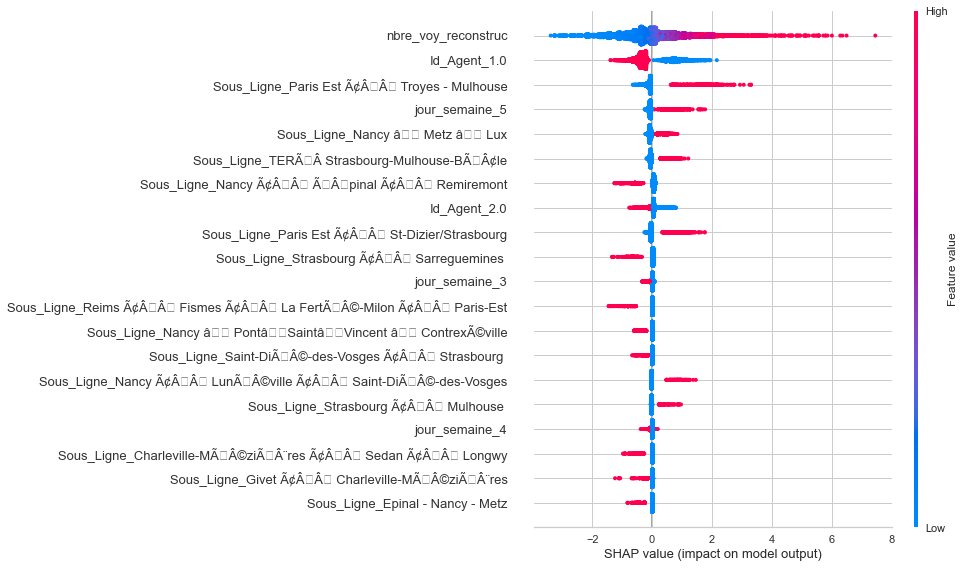

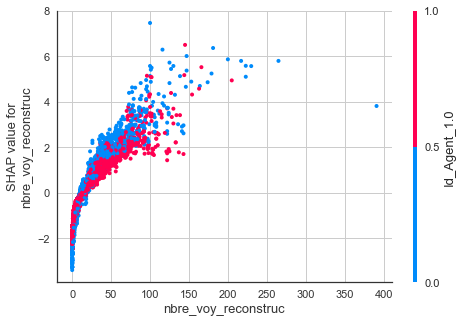

In [ ]:
# create a model
lightgbm = create_model('lightgbm')
# interpret overall model 
interpret_model(lightgbm)
# correlation shap plot
interpret_model(lightgbm, plot = 'correlation')
# interactive reason plot
interpret_model(lightgbm, plot = 'reason')
# reason plot at observation level
interpret_model(lightgbm, plot = 'reason', observation = 1) #observation

In [ ]:
Résumé:
nbre_voy_reconst qui est la variable la plus importante, a un impact positif  quand la valeur de cette variable est élevée. 
id_agent_1.0qui est la seconde  variable la plus importante, a un impact négatif quand la valeur de cette variable est élevée.
    

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4215,4.5272,2.1277,0.3888,0.5575,0.6065
1,1.3951,4.2905,2.0713,0.4151,0.5551,0.5922
2,1.3774,3.9761,1.9940,0.4482,0.5517,0.5741
3,1.3796,4.1091,2.0271,0.4434,0.5548,0.6039
4,1.3863,4.1194,2.0296,0.4247,0.5573,0.6081
5,1.3596,3.8236,1.9554,0.4050,0.5477,0.6063
6,1.3883,4.2353,2.0580,0.4087,0.5522,0.5858
7,1.3708,4.1589,2.0393,0.4142,0.5514,0.5678
8,1.3425,3.7515,1.9369,0.4693,0.5406,0.5768
9,1.3961,4.1255,2.0311,0.3949,0.5617,0.6084


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

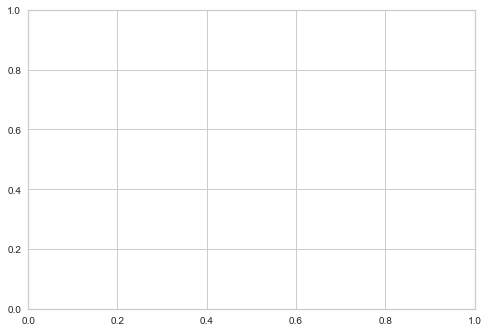

In [8]:
# create a model
lightgbm = create_model('lightgbm')
# evaluate a model 
evaluate_model(lightgbm)
 

#                         CLASSIFICATION

#      1 Train and Evaluate Model

In [2]:
import pandas as pd
from pycaret.classification import *

C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# LOAD DATA

In [3]:
base= pd.read_csv('base_2021.csv', index_col = 0)
base.head()

,Num_Train,Date,nbre_operation,Id_Agent,Direction_Ligne,Sous_Ligne,Ligne_Presence_imposee,Gare Origine,Heure_Origine,Gare Fin,Heure_Fin,nbre_voy_reconstruc,annee,mois,jour_semaine,periode_pointe,Sens_circulation
0,836404,2021-04-05,1,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,39.0,2021,4,0,hors pointe,1
1,836404,2021-04-11,7,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,65.0,2021,4,6,hors pointe,1
2,836404,2021-04-18,7,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,75.0,2021,4,6,hors pointe,1
3,836404,2021-04-25,14,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,129.0,2021,4,6,hors pointe,1
7,836406,2021-04-02,2,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,12,Vittel,2,8.0,2021,4,4,pointe midi,1


In [5]:
base_ = base.drop(['Date', 'Num_Train', 'annee', 'Heure_Fin', 'Gare Origine', 'Gare Fin','Direction_Ligne'
                      , 'Ligne_Presence_imposee', 'Sens_circulation','Heure_Origine','periode_pointe','mois'] , axis = 1)

base_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38660 entries, 0 to 39026
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nbre_operation       38660 non-null  int64  
 1   Id_Agent             38660 non-null  float64
 2   Sous_Ligne           38660 non-null  object 
 3   nbre_voy_reconstruc  38660 non-null  float64
 4   jour_semaine         38660 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [6]:
base_.isna().sum()

nbre_operation         0
Id_Agent               0
Sous_Ligne             0
nbre_voy_reconstruc    0
jour_semaine           0
dtype: int64

In [5]:
base_.dtypes

nbre_operation           int64
Id_Agent               float64
Sous_Ligne              object
nbre_voy_reconstruc    float64
jour_semaine             int64
dtype: object

In [7]:
cat_features = ['Id_Agent', 'Sous_Ligne', 'jour_semaine']
experiment = setup(base_, target='nbre_operation', categorical_features=cat_features)

,Description,Value
0,session_id,4643
1,Target,nbre_operation
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(38660, 5)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()




IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:45:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3461,0.0000,0.0732,0.3060,0.3053,0.1629,0.1708,663.6720
lr,Logistic Regression,0.3284,0.0000,0.0654,0.2642,0.2801,0.1352,0.1396,105.4250
ridge,Ridge Classifier,0.3171,0.0000,0.0561,0.2329,0.2513,0.1043,0.1108,0.2230
lda,Linear Discriminant Analysis,0.3078,0.0000,0.0659,0.2827,0.2745,0.1257,0.1316,1.4670
dt,Decision Tree Classifier,0.3053,0.0000,0.0680,0.2738,0.2861,0.1348,0.1356,0.5700
knn,K Neighbors Classifier,0.3007,0.0000,0.0665,0.2529,0.2697,0.1134,0.1149,3.8000
et,Extra Trees Classifier,0.3007,0.0000,0.0702,0.2718,0.2835,0.1310,0.1316,17.8360
ada,Ada Boost Classifier,0.3004,0.0000,0.0513,0.3087,0.2049,0.0716,0.1452,4.0560
rf,Random Forest Classifier,0.2984,0.0000,0.0736,0.2860,0.2916,0.1389,0.1390,11.1890
svm,SVM - Linear Kernel,0.2726,0.0000,0.0671,0.2436,0.1963,0.1079,0.1378,14.2580


#      2 TEST MODEL

In [ ]:
best_model = compare_models()


In [ ]:
predict_model(best_model, base_.tail())

In [ ]:
#create a model
lr = create_model('lr')
#plot a model
plot_model(lr)

# 3  Save Model

In [ ]:
save_model(best_model, model_name='lightgmb-model')